# CALCULUS: ĐẠO HÀM VÀ CÁCH NHÌN KHÁC CỦA LINEAR REGRESSION

Cơ bản về bài toán LR:

Giá sử có một model y = wx + b

Tìm w và b để fit các data dự đoán sao cho khớp nhất với mô hình.

Tại đây hàm Loss (L) = y - $\hat{y}$ - để tìm cực đại hoặc cực tiểu, sử dụng L2 Norm để đạo hàm được dễ dàng hơn

L1 là sử dụng trị tuyệt đối |L|, L2 là bình phương $L^2$



### Linear Regression in Simple method

Code dưới đây thể hiện bước cơ bản để thực hiện việc tìm $w_i$ và bias theo L2_norm 

S1: $\hat{y}$ = $w_i$x + b, lấy sample là một mẫu training của 1 data

S2: Tính $\hat{y}$ = $w*x_i$ + b

S3: Tính hàm mất mát Loss L = ($\hat{y} - y_i$)

S3: Tính toán đạo hàm 
$$\frac{\partial{L}}{\partial{w}} = {\frac{\partial{L}}{\partial{\hat{y}}}*\frac{d\hat{y}}{w}$$ và $$\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{\hat{y}}}*\frac{d\hat{y}}{b}$$

S4: Xác định các tham số dựa trên learning rate {\eta}, hay step size 

$$w_i$ = $w - \eta* \frac{\partial{L}}{\partial{w}}$$
$$b_i$ = $b - \eta* \frac{\partial{L}}{\partial{b}}$$  

Chú ý: Có thể khởi tạo các tham số ban đầu bằng chuẩn Gauss

In [1]:
# import library
import pandas as pd
import numpy as np

In [2]:
# Import data from one train data
train_data = pd.read_csv('kc_house_train_data.csv')
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17384 non-null  int64  
 1   date           17384 non-null  object 
 2   price          17384 non-null  float64
 3   bedrooms       17384 non-null  int64  
 4   bathrooms      17384 non-null  float64
 5   sqft_living    17384 non-null  int64  
 6   sqft_lot       17384 non-null  int64  
 7   floors         17384 non-null  float64
 8   waterfront     17384 non-null  int64  
 9   view           17384 non-null  int64  
 10  condition      17384 non-null  int64  
 11  grade          17384 non-null  int64  
 12  sqft_above     17384 non-null  int64  
 13  sqft_basement  17384 non-null  int64  
 14  yr_built       17384 non-null  int64  
 15  yr_renovated   17384 non-null  int64  
 16  zipcode        17384 non-null  int64  
 17  lat            17384 non-null  float64
 18  long  

Từ dữ liệu trên tách ra 3 đặc trưng: 'price', 'bathroom' và 'bedrooms' để tính toán tham số cho mô hình hồi quy đơn giản

In [4]:
train_data_1 = train_data[['price', 'bedrooms', 'sqft_living']][:100]
train_data_1.head()

,price,bedrooms,sqft_living
0,221900.0,3,1180
1,538000.0,3,2570
2,180000.0,2,770
3,604000.0,4,1960
4,510000.0,3,1680


In [5]:
train_data_1.iloc[2, 2]

770

Quan sát dữ liệu đặc trưng của giá nhà theo bed_rooms và sqrt_living

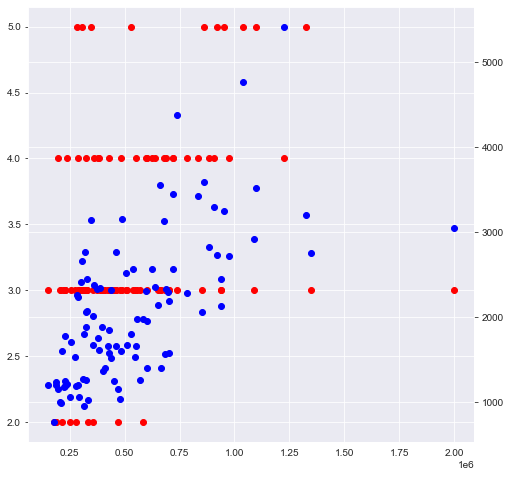

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 8))

# ax1.plot(kind='bar')
ax1.scatter(train_data_1['price'], train_data_1['bedrooms'], color='r')
ax2 = ax1.twinx()

ax2.scatter(train_data_1['price'], train_data_1['sqft_living'], color='b' )



Hoặc tìm đồ thị tương quan

<AxesSubplot:>

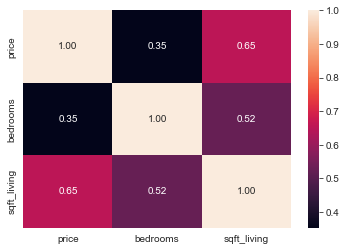

In [7]:
import seaborn as sns

sns.heatmap(train_data_1.corr(), annot=True, fmt='.2f')

##### Có thể thấy sự tương quan giữa sqft_living và price là cao hơn nhiều so với bedroom

Áp dụng 1 bài toán tìm cực trị của các tham số theo Stochastic Gradient Descent

In [8]:
# Creat LR function with 2 features
def predict_lr(w1, w2, x1, x2, b):
    return w1*x1 + w2*x2 + b

# Compute loss function
def loss_func(y_predict, y):
    return (y_predict - y) ** 2

# Compute derivative 
def gradient_w(y_predict, y, xi):
    # dL/dw
    dl_dw = 2*xi*(y_predict - y)
    return dl_dw

def gradient_bias(y_predict, y):
    # dL/db
    dl_db = 2*(y_predict - y) 
    return dl_db

def update_weight_wi(wi, dl_dw, eps):
    wi -=(eps*dl_dw)
    return wi

def update_weight_bias(b, dl_db, eps):
    b -= (eps*dl_db)
    return b


Tạo hàm tính toán và trả về các giá trị tham số dựa vào công thức Newton-Raphson

In [9]:
def lr_parameter_calculate(data, epoch_max, epsilon, N):
    # Khởi tạo các tham số wi
    import random
    w1 = random.gauss(mu=0, sigma=.01)
    w2 = random.gauss(mu=0, sigma=.01)
    b = 0
    loss = []
    # loop để lặp tìm w
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = data.iloc[i, 1]
            x2 = data.iloc[i, 2]
            y = data.iloc[i, 0]            
            
            # Tính giá trị predict
            y_hat = predict_lr(w1, w2, x1, x2, b)
            
            # Tinh loss
            loss.append(loss_func(y_hat, y))
            
            # Tính toán đạo hàm
            dl_dw1 = gradient_w(y_hat, y, x1)
            dl_dw2 = gradient_w(y_hat, y, x2)
            dl_db = gradient_bias(y_hat, y)
            
            # update weight
            w1 = update_weight_wi(w1, dl_dw1, epsilon)
            w2 = update_weight_wi(w2, dl_dw2, epsilon)
            b = update_weight_bias(b, dl_db, epsilon)
            
    return loss           

In [10]:
# Sô lần lặp 
epoch_max = 10
epsilon = 1e-5
N = len(train_data_1)

loss_data = lr_parameter_calculate(train_data_1, epoch_max, epsilon, N)

print(loss_data[:10])

[49247504243.23771, 166971965178476.66, 2.5762389910646032e+17, 1.9679461933259955e+20, 8.314346790596934e+23, 2.660609990230659e+28, 9.164095493049985e+32, 1.1705816391354942e+36, 1.5218781706341946e+39, 6.674054579262182e+42]


C:\Users\Vutua\AppData\Local\Temp\ipykernel_26380\537489797.py:7: RuntimeWarning: overflow encountered in scalar power
  return (y_predict - y) ** 2
C:\Users\Vutua\AppData\Local\Temp\ipykernel_26380\537489797.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dl_dw = 2*xi*(y_predict - y)
C:\Users\Vutua\AppData\Local\Temp\ipykernel_26380\537489797.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  wi -=(eps*dl_dw)


In [18]:
A = np.array([[1, -3, 5], [-2, 1, 4], [6, -2, 1]])
np.linalg.matrix_rank(A)
print(A)

[[ 1 -3  5]
 [-2  1  4]
 [ 6 -2  1]]
